<a href="https://colab.research.google.com/github/Gaurav-Ramachandra/Sem6-ML_Lab/blob/main/ML%20Lab5%2021-4-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Accuracy: 0.882

📊 Classification Report:

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.91      0.89       260
Ürgüp Sivrisi       0.90      0.85      0.87       240

     accuracy                           0.88       500
    macro avg       0.88      0.88      0.88       500
 weighted avg       0.88      0.88      0.88       500



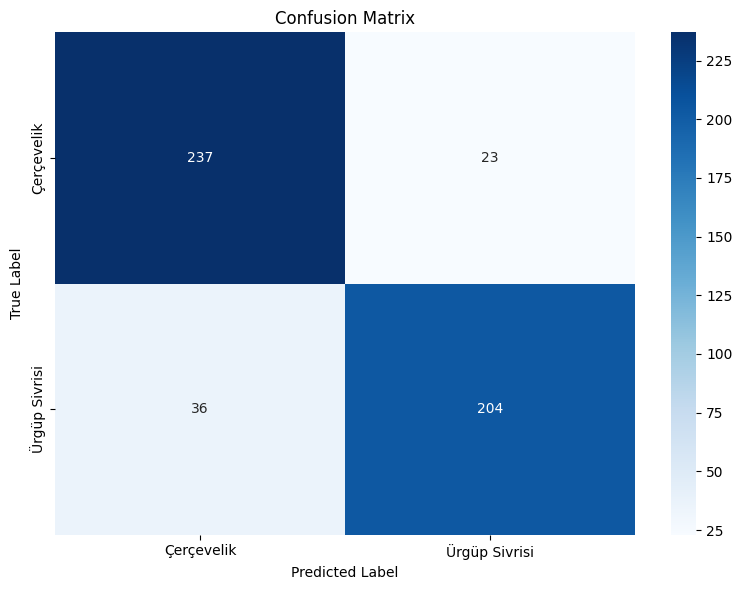

<ipython-input-2-fc11d849425d>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


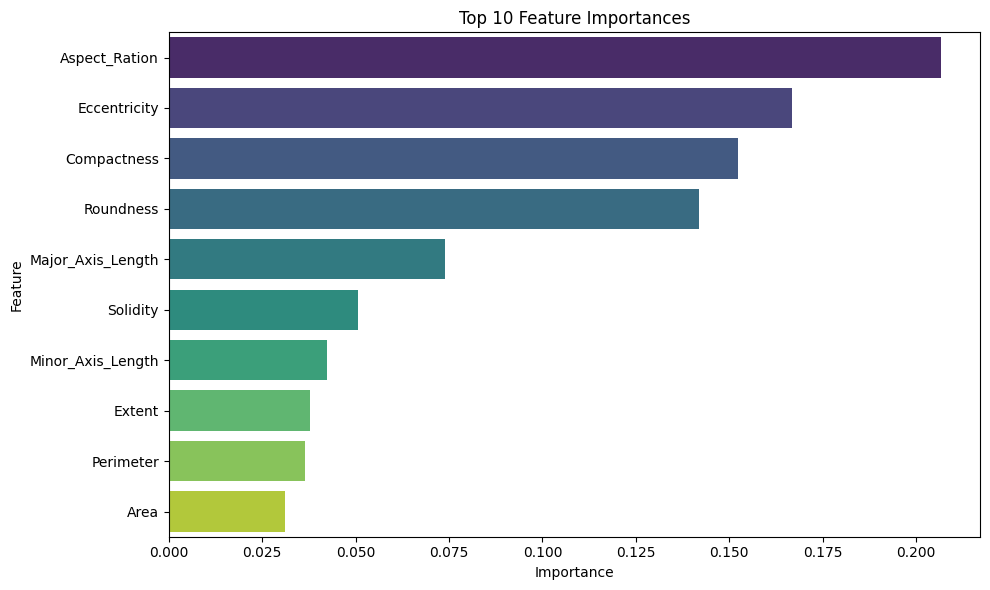

In [ ]:
# Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab5/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name='Pumpkin_Seeds_Dataset')

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot top 10 feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1][:10]  # Top 10

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


✅ Mean Squared Error: 74.16256888031462
📈 R² Score: 0.993745080932228


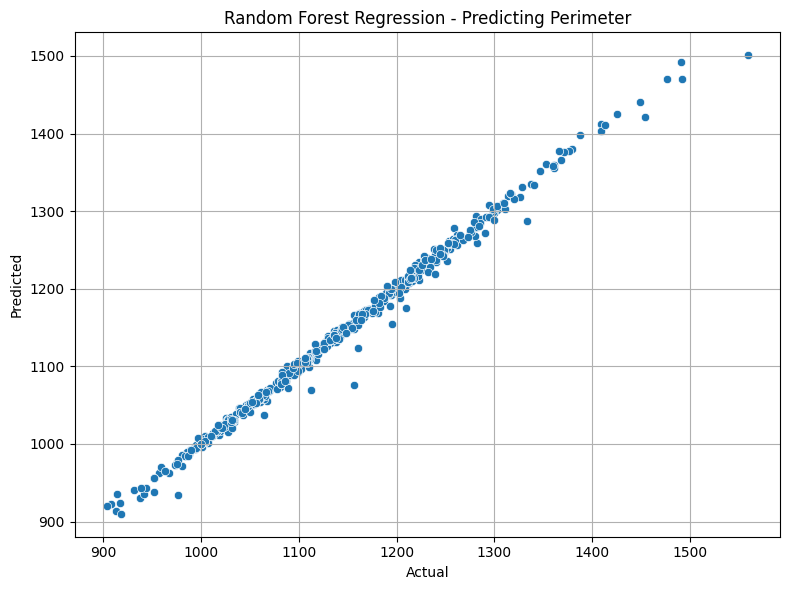

<ipython-input-3-594acce0aa1d>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="crest")


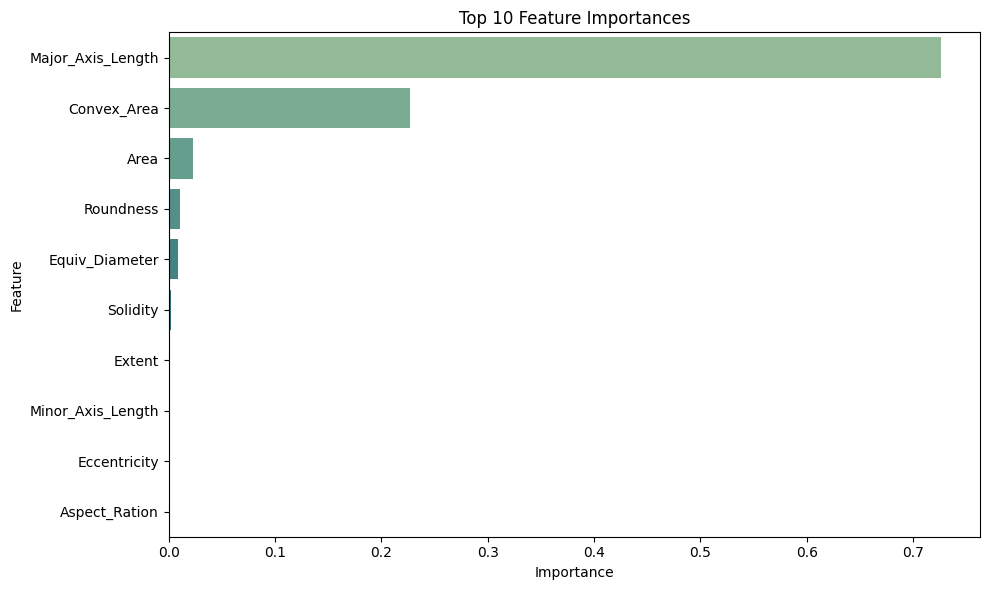

In [ ]:
# Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab5/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name='Pumpkin_Seeds_Dataset')

# Choose a regression target, e.g., 'Perimeter'
target_column = 'Perimeter'

# Features and target
X = df.drop(columns=['Class', target_column])  # Exclude 'Class' and target from features
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = rf_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Mean Squared Error:", mse)
print("📈 R² Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Random Forest Regression - Predicting {target_column}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot feature importances
importances = rf_regressor.feature_importances_
features = X.columns
indices = importances.argsort()[::-1][:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="crest")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
